# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [7]:
import numpy as np
from types import SimpleNamespace
from inauguralproject import HouseholdSpecializationModelClass
from inauguralproject import NewModel
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize


# autoreload modules when code is run. Otherwise we dont see the recent changes
%load_ext autoreload
%autoreload 2

# Importing our own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Firstly, we assume $L_M, L_F, H_M, H_F \in [\frac{0·24}{48},\frac{1·24}{48}, \frac{2·24}{48}, ... , \frac{48·24}{48}] $

Illustrate how $\frac{H_F}{H_M}$ changes when varying $α∈\{0.25, 0.50, 0.75\}$ and $σ = \{0.5, 1.0, 1.5\}$.


Approach:

1. We define the values of our parameteres, $\alpha$ and $\sigma$.


2. We loop over all the different combinations of $\alpha$ and $\sigma$ values.


3. Then we visualize our results using a heatmap as shown below.



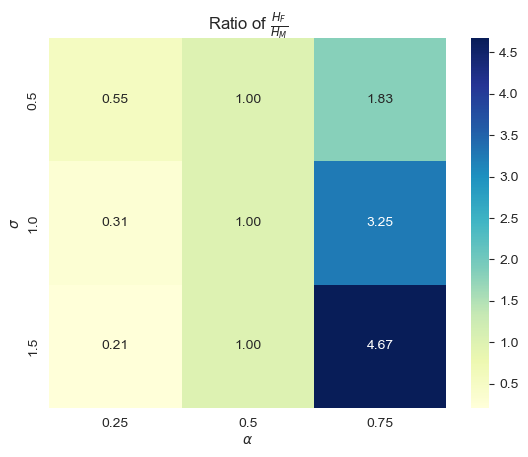

In [8]:
# We import our class

model = HouseholdSpecializationModelClass()

# List with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

df = pd.DataFrame(columns=pd.Index(alpha_list, name=r'sigma // alpha'),index=pd.Index(sigma_list, name=""))


for i in alpha_list:
    for j in sigma_list:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

# We convert the values to floats
df = df.astype(np.float64)

df = df.astype(np.float64)

# Heatmap with alpha vs sigma ratios
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(r"Ratio of $\frac{H_F}{H_M}$")
plt.xlabel(r"$\alpha$")
plt.ylabel("$\sigma$")
plt.show()



**Code:**

The calc_utility function calculates the consumption of market goods, home production, total consumption utility, and disutility of work, and then returns the difference between the utility and disutility.

The solve_discrete function finds the combination of labor supplied by the husband and wife and the amount of home-produced goods that maximizes the utility of the household. It first generates all possible combinations of labor and home-produced goods, then calculates the utility for each combination using the calc_utility function. If any of the combinations violate the constraint that total hours worked cannot exceed 24, the utility is set to minus infinity. The function then finds the combination that maximizes the utility, saves the values of labor and home-produced goods and returns it.

**Result:**

The table shows values of $\frac{H_{F}}{H_{M}}$ given varying values of $\sigma$ and $\alpha$. $\sigma$ is the elasticity of substitution in home production and $\alpha$ is the productivity in home production of women. We see that $\frac{H_{F}}{H_{M}}$ is decreasing in $\sigma$ for low $\alpha$ and increasing in $\sigma$ for high $\alpha$. 

When alpha is low, it means that the female is less productive than the male in home production. In this case, as sigma increases (i.e., home production becomes more substitutable between male and female), it becomes easier for the male to take over more of the home production tasks, resulting in a decrease in $\frac{H_{F}}{H_{M}}$.

On the other hand, when alpha is high, it means that the female is more productive than the male in home production. In this case, as sigma increases (i.e., home production becomes more substitutable between male and female), it becomes easier for the female to substitute for the male in home production tasks, resulting in an increase in $\frac{H_{F}}{H_{M}}$.

# Question 2

Plot log $\frac{H_F}{H_M}$ against log $\frac{w_F}{w_M}$ for $w_F \in \{0.8, 0.9, 1.0, 1.1 ,1.2\}$.



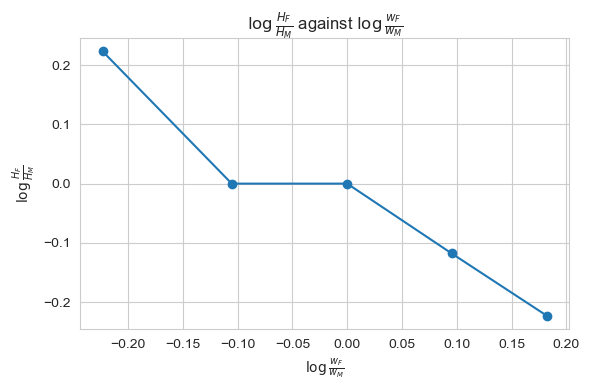

In [14]:
import seaborn as sns
sns.set_style("whitegrid")

model = HouseholdSpecializationModelClass()

alpha = 0.5
sigma = 1
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]

# For creating the figure
fig, ax = plt.subplots(figsize=(6, 4))

results_list = []
for wF in wF_list:
    # We want to modify the values of alpha, sigma and wF
    model.par.alpha = alpha
    model.par.sigma = sigma
    model.par.wF = wF
    
    # To solve the model 
    results = model.solve_discrete()
    ratio = np.log(results.HF / results.HM)
    
    results_list.append((alpha, sigma, wF, ratio))

# We plot the result
wF_arr, ratio_arr = zip(*[r[2:] for r in results_list])
ax.plot(np.log(np.array(wF_arr)/model.par.wM), ratio_arr, marker='o',)

# Title and axis labels
ax.set_title(r'$\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$')
ax.set_xlabel(r'$\log\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')

# Layout
plt.tight_layout()
plt.show()



**Code:**


The code then specifies a list of values for the parameters $\alpha$, $\sigma$, and $w_{F}$ that will be used to solve the model for a range of different parameter values. The results_list variable is initialized as an empty list.

The code then runs three nested loops over the parameter values. It then solves the model using the solve_discrete() method of the model instance.The ratio variable is then computed as the ratio of the female home production to male home production. This ratio is added, along with the current values of $\alpha$, $\sigma$, and $w_{F}$, to the results_list variable.

After all iterations of the loops have completed, the code plots the results. For each $\alpha$ a new plot is produced showing different colored lines for each $\sigma$. The x-axis represents the logarithm of the ratio of female to male market wages $\frac{w_{F}}{w_{M}}$, while the y-axis represents the logarithm of the ratio of female to male home production $\frac{H_{F}}{H_{M}}$.

**Result:**


We see that $\frac{H_{F}}{H_{M}}$ is decreasing in $\frac{w_{F}}{w_{M}}$ in all iterations. This means that as the ratio of female-to-male wages (wF/wM) increases, the ratio of female-to-male home production (HF/HM) tends to decrease. In other words, as women earn a higher wage relative to men, they tend to spend less time in home production relative to men.

Runtime is approx. 16 seconds

# Question 3

It is now assumed that $L_M, L_F, H_M, H_F \in \{0.8, 0.9, 1.0, 1.1, 1.2\}$

Plot log $\frac{H_F}{H_M}$ against log $\frac{w_F}{w_M}$ for $w_F \in \{0.8, 0.9, 1.0, 1.1 ,1.2\}$.


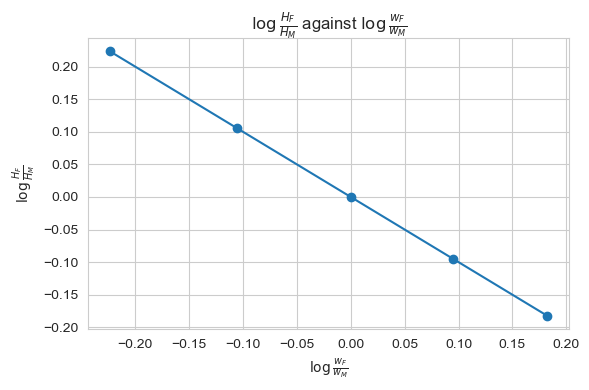

In [15]:
model = HouseholdSpecializationModelClass()

alpha = 0.5
sigma = 1
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]

# The figure
fig, ax = plt.subplots(figsize=(6, 4))

results_list = []
for wF in wF_list:
    # We again modify the values of alpha, sigma and wF
    model.par.alpha = alpha
    model.par.sigma = sigma
    model.par.wF = wF
    
    # To solve model
    results = model.solve()
    ratio = np.log(results.HF / results.HM)
    
    results_list.append((alpha, sigma, wF, ratio))

# Plotting the result
wF_arr, ratio_arr = zip(*[r[2:] for r in results_list])
ax.plot(np.log(np.array(wF_arr)/model.par.wM), ratio_arr, marker='o', label=f'$\\sigma={sigma}$')

# Title and axis labels
ax.set_title(r'$\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$')
ax.set_xlabel('$\\log\\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')

# Layout
plt.tight_layout()
plt.show()


**Code:** 
We minimize the objective function: -calc_utility by using the trust-constr method and saves the solution.

**Result:**
The result reflects the results of the previous results. We see that $\frac{H_{F}}{H_{M}}$ is decreasing in $\frac{w_{F}}{w_{M}}$ in all iterations.

# Opgave 4

The estimates from Siminski and Yetsenga (2022) indicates that, on average, females spend more hours on home production than males even when wages are the same. This suggests that there is an inherent gender difference in the allocation of home production hours with females taking on a larger share. The estimated negative slope of the regression indicates that female to male wages increases, the gap between hours spent decreases. This indicates that as the opportunity cost for females increases the allocation of home production hours becomes more balanced between the two genders. 

To solve this problem we use the model that is defined in previous sections. We then use the estimate function to find the $\alpha$ and $\sigma$ values that best fit the $\beta_{0}$ and $\beta_{1}$ target coefficients. 

The estimate function defines the minimize_squared_differences() function, which takes a pair of $\alpha$ and $\sigma$ values as input and computes the squared differences between the model's coefficients and the target coefficients for the given $\alpha$ and $\sigma$ values. 

We then set some guess for the $\alpha$ and $\sigma$ values and use the optimize.minimize() function to find the optimal $\alpha$ and $\sigma$ values that minimize the squared differences i.e. solves the problem:

 $\min_{\alpha,\sigma}\left(\beta_{0}-\hat{\beta}_{0}\right)^{2}+\left(\beta_{1}-\hat{\beta}_{1}\right)^{2}$

 The computation takes approximately 27 seconds.

In [16]:
best_alpha, best_sigma = model.estimate()

/Users/nicolaimoller/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/Users/nicolaimoller/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/Users/nicolaimoller/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtai

Best-fit alpha: 0.9820, Best-fit sigma: 0.1000
Error (squared differences): 0.000000


We see that to fit the data we get estimates that suggest that there is a strong comparative advantage for females in home production and a low degree of substitutability between male and female labor inputs. 

/Users/nicolaimoller/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


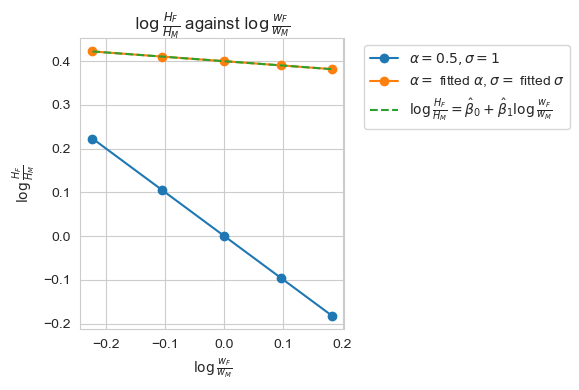

In [17]:
# Figure
fig, ax = plt.subplots(figsize=(6, 4))

#  Labels for each combination of alpha and sigma
custom_labels = {
    (0.5, 1): r'$\alpha=0.5,\sigma=1$',
    (best_alpha, best_sigma): r'$\alpha=$ fitted $ \alpha$, $\sigma=$ fitted $\sigma$'
}

results_list = []
for alpha, sigma in [(0.5, 1), (best_alpha, best_sigma)]:
    for wF in wF_list:
        # We modify the values of alpha, sigma and wF
        model.par.alpha = alpha
        model.par.sigma = sigma
        model.par.wF = wF

        # Solve the model
        results = model.solve()
        ratio = np.log(results.HF / results.HM)

        results_list.append((alpha, sigma, wF, ratio))

    # Plotting results
    wF_arr, ratio_arr = zip(*[r[2:] for r in results_list if (r[0], r[1]) == (alpha, sigma)])
    ax.plot(np.log(np.array(wF_arr) / model.par.wM), ratio_arr, marker='o', label=custom_labels[(alpha, sigma)])

# Plot for Siminski and Yetsenga 
log_wF_wM_arr = np.log(np.array(wF_arr) / model.par.wM)
line_values = 0.4 + (-0.1) * log_wF_wM_arr
ax.plot(log_wF_wM_arr, line_values, linestyle='--', label=r'$\log\frac{H_{F}}{H_{M}}=\hat{\beta}_{0}+\hat{\beta}_{1}\log\frac{w_{F}}{w_{M}}$')

# Title and axis labels 
ax.set_title(r'$\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$')
ax.set_xlabel('$\\log\\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')

# Adding legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Layoutt
plt.tight_layout()
plt.show()


Plotting the results we see how the new fitted values for $\alpha$ and $\sigma$ matches the data perfectly. 

# Question 5

We update utility to take childcare into consideration. New utility becomes:

$\frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_{M}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right)+\delta N^{\gamma}$

where
 
$\gamma \in (0,1)$: share parameter for child care in the utility function

$\delta>0$: weight parameter for child care in the utility function

$N$ is the number of children

We create a new class and run the regression to see if the resulting coefficients are different

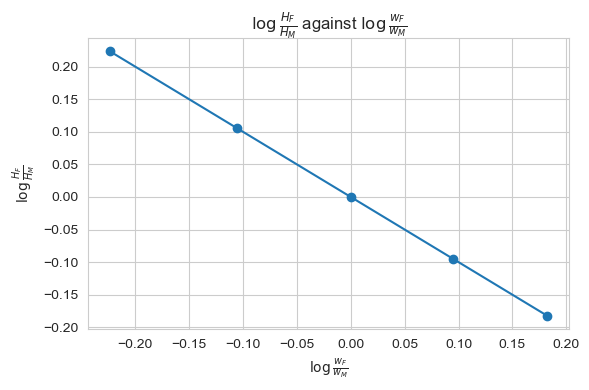

In [18]:
model = NewModel()

alpha = 0.5
sigma = 1
wF_list = [0.8, 0.9, 1.0, 1.1, 1.2]
gamma = 1
delta = 1.0
N = 1


# Figure
fig, ax = plt.subplots(figsize=(6, 4))

results_list = []
for wF in wF_list:
    # Modify value of alpha, sigma and wF 
    model.par.alpha = alpha
    model.par.sigma = sigma
    model.par.wF = wF
    
    # Solve model
    results = model.solve()
    ratio = np.log(results.HF / results.HM)
    
    results_list.append((alpha, sigma, wF, ratio))

# Plotting results
wF_arr, ratio_arr = zip(*[r[2:] for r in results_list])
ax.plot(np.log(np.array(wF_arr)/model.par.wM), ratio_arr, marker='o', label=f'$\\sigma={sigma}$')

# Title and axis labels
ax.set_title(r'$\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$')
ax.set_xlabel('$\\log\\frac{w_F}{w_M}$')
ax.set_ylabel('$\\log\\frac{H_F}{H_M}$')

# Layout
plt.tight_layout()
plt.show()


We see that the plot is identical to the model without children. We can plot the heatmap again to see if the alpha and sigma values makes a difference:

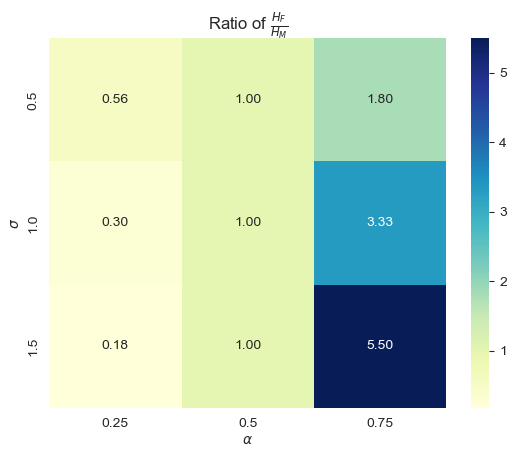

In [19]:
model = NewModel()

# List with the values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

df = pd.DataFrame(columns=pd.Index(alpha_list, name=r'sigma // alpha'),index=pd.Index(sigma_list, name=""))

# Iterating over each combination
for i in alpha_list:
    for j in sigma_list:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

# Converting to floats
df = df.astype(np.float64)

# Heatmap ratios with alpha vs sigma
sns.heatmap(df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title(r"Ratio of $\frac{H_F}{H_M}$")
plt.xlabel(r"$\alpha$")
plt.ylabel("$\sigma$")
plt.show()


We see that when $\alpha=0.5$ the model is identical to the model without children but when the sexes contribute unequally the results differ. When women contribute more $(\alpha>0.5)$ and the elasticity of substitution is large $\sigma>1$ they tend to allocate more time in home production when they have children compared to the model when there is no children. However, it makes no difference to the slope on the contineous function when $\alpha=0.5$ and therefore it does nothing to match the data. 